In [1]:
from pyoculus.problems import CylindricalBfield, AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pickle

In [18]:
# separatrix = {"type": "circular-current-loop", "amplitude": -4.2, "R": 3, "Z": -2.2}
separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}
# separatrix = {"type": "circular-current-loop", "amplitude": -4, "R": 3, "Z": -2.2}
maxwellboltzmann = {"m": 3, "n": -2, "d": 1, "type": "maxwell-boltzmann", "amplitude": 1e-5}
gaussian10 = {"m": 1, "n": 0, "d": 1, "type": "gaussian", "amplitude": 0.1}

ps = AnalyticCylindricalBfield.without_axis(6, 0, 0.91, 0.6, perturbations_args = [separatrix, maxwellboltzmann], Rbegin = 2, Rend = 8, niter = 800, guess=[6.4,-0.7],  tol = 1e-9)
# ps = AnalyticCylindricalBfield(3, 0, 0.9, 0.7, perturbations_args = [separatrix])

0 - dr : 0.022902691867512995
1 - RZ : [ 6.41398445 -0.69363036]
1 - dr : 0.0001521292959925274
2 - RZ : [ 6.41409652 -0.69367589]
2 - dr : 1.3214790616749619e-08
3 - RZ : [ 6.41409653 -0.6936759 ]
3 - dr : 8.881784197001252e-16


### Poincare

In [19]:
results = [[6.17305596, 0, -4.6485854]]

In [23]:
# set up the integrator for the Poincare
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["nPtrj"] = 10
pparams["nPpts"] = 200
pparams["zeta"] = 0

# # Set RZs for the normal (R-only) computation
# pparams["Rbegin"] = 3.01
# pparams["Rend"] = 5.5

# Set RZs for the tweaked (R-Z) computation
nfieldlines = pparams["nPtrj"] + 1

# Directly setting the RZs
# Rs = np.linspace(3.2, 3.15, nfieldlines)
# Zs = np.linspace(-0.43, -2.5, nfieldlines)
# RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

# Two interval computation opoint to xpoint then xpoint to coilpoint
n1, n2 = int(np.ceil(nfieldlines / 2)), int(np.floor(nfieldlines / 2))
xpoint = np.array([results[0][0], results[0][2]])
opoint = np.array([ps._R0, ps._Z0])
coilpoint = np.array(
    [ps.perturbations_args[0]["R"], ps.perturbations_args[0]["Z"]]
)

# Simple way from opoint to xpoint then to coilpoint
# Rs = np.concatenate((np.linspace(opoint[0]+1e4, xpoint[0], n1), np.linspace(xpoint[0], coilpoint[0]-1e-4, n2)))
# Zs = np.concatenate((np.linspace(opoint[1]+1e4, xpoint[1], n1), np.linspace(xpoint[1], coilpoint[1]-1e-4, n2)))
# RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

# Sophisticated way more around the xpoint
deps = 0.05
RZ1 = xpoint + deps * (1 - np.linspace(0, 1, n1)).reshape((n1, 1)) @ (
    opoint - xpoint
).reshape((1, 2))
RZ2 = xpoint + deps * np.linspace(0, 1, n2).reshape((n2, 1)) @ (
    coilpoint - xpoint
).reshape((1, 2))
RZs = np.concatenate((RZ1, RZ2))

# Set up the Poincare plot object
pplot = PoincarePlot(ps, pparams, integrator_params=iparams)

In [24]:
# # R-only computation
# pplot.compute()

# R-Z computation
pplot.compute(RZs)

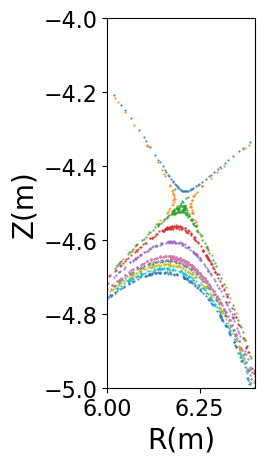

In [ ]:
fig_perturbed, ax_perturbed = pplot.plot(marker=".", s=1)
ax_perturbed.set_xlim(6, 6.4)
ax_perturbed.set_ylim(-5, -4)

ax_perturbed.scatter(ps._R0, ps._Z0, marker="o", edgecolors="black", linewidths=1)
plt.show()

In [ ]:
date = datetime.datetime.now().strftime("%m%d%H%M")
dumpname = f"../output/toybox_tok_{date}.pkl"
with open(dumpname, "wb") as f:
    pickle.dump(fig_perturbed, f)

### Finding fixed points

In [ ]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-7

pparams = dict()
pparams["nrestart"] = 0
pparams['niter'] = 600

fp_perturbed = FixedPoint(ps, pparams, integrator_params=iparams)

# fp_perturbed.compute(guess=[fp.x[0], fp.z[0]], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[3.117263523069049, -1.6173346133145015], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[3.1072023810385443, -1.655410284892828], pp=0, qq=1, sbegin=0.1, send=6, tol = 4e-12)
# fp_perturbed.compute(guess=[3.117264916246293, -1.617334822348791], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[4.624454, 0.], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[4.43582958 -1.22440153], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
fp_perturbed.compute(guess=[6.2, -4.45], pp=0, qq=1, sbegin=1, send=8, tol = 1e-10)

0 - [DeltaR, DeltaZ] : [0.32752662 0.23072389] - dtheta : 0.089096906190544
0 - [StepR, StepZ]: [-0.0056911  -0.04160033]
1 - RZ : [ 6.1943089  -4.49160033] - rhotheta : [ 3.80427607 -1.62860269]
1 - [DeltaR, DeltaZ] : [-0.13082239 -0.13809262] - dtheta : 0.031036895097905637
1 - [StepR, StepZ]: [0.00562865 0.0007411 ]
2 - RZ : [ 6.19993754 -4.49085923] - rhotheta : [ 3.80321511 -1.62713645]
2 - [DeltaR, DeltaZ] : [-0.0113486  -0.01846401] - dtheta : 0.0026923284821303017
2 - [StepR, StepZ]: [ 0.00366035 -0.00498555]
3 - RZ : [ 6.20359789 -4.49584478] - rhotheta : [ 3.80798867 -1.62610302]
3 - [DeltaR, DeltaZ] : [1.35870552e-04 4.94996362e-05] - dtheta : 3.4907804486783434e-05
3 - [StepR, StepZ]: [ 2.48976792e-05 -5.38902445e-05]
4 - RZ : [ 6.20362279 -4.49589867] - rhotheta : [ 3.8080411  -1.62609571]
4 - [DeltaR, DeltaZ] : [-5.11385867e-09 -7.59202035e-09] - dtheta : 1.2306653474070117e-09
4 - [StepR, StepZ]: [ 1.37740397e-09 -1.80735782e-09]
5 - RZ : [ 6.20362279 -4.49589868] - rhot

In [ ]:
hist = np.array(fp_perturbed.history)
plt.plot(hist[:, 0], hist[:, 1])

In [ ]:
results = [list(p) for p in zip(fp_perturbed.x, fp_perturbed.y, fp_perturbed.z)]

In [ ]:
results

In [ ]:
fp_perturbed.x, fp_perturbed.y, fp_perturbed.z

In [ ]:
# ax_perturbed.scatter(fp_perturbed.x[0], fp_perturbed.z[0], marker="X", edgecolors="black", linewidths=1)
# fig_perturbed

### Back on manifold

In [ ]:
iparams = dict()
iparams["rtol"] = 1e-16

manifold = Manifold(fp_perturbed, ps, integrator_params=iparams)

manifold.compute(nintersect = 4, neps = 300, epsilon=3e-9, directions="u+")
manifold.compute(nintersect = 3, neps = 300, epsilon=3e-9, directions="u-")
manifold.compute(nintersect = 4, neps = 100, epsilon=2e-8, directions="s+")
manifold.compute(nintersect = 4, neps = 100, epsilon=2e-8, directions="s-")

In [ ]:
dumpname = "../output/toybox_tok_04151041.pkl"

# fig_perturbed = pickle.load(open("../output/toybox_.pkl", "rb"))
fig_perturbed = pickle.load(open(dumpname, "rb"))
ax_perturbed = fig_perturbed.get_axes()[0]

for col in ax_perturbed.collections:
    col.set_color('black')
    col.set_sizes([0.5])

plt.show()

In [ ]:
# close up view
ax_perturbed.set_xlim(3.08, 3.13)
ax_perturbed.set_ylim(-1.67, -1.63)

In [ ]:
manifold.plot(ax_perturbed, directions="u+u-s+s-")
fig_perturbed

In [ ]:
# general view
ax_perturbed.set_xlim(2.3, 4)
ax_perturbed.set_ylim(-1.9,1)

In [ ]:
# plan americain
ax_perturbed.set_xlim(3, 3.2)
ax_perturbed.set_ylim(-1.7, -1.6)

In [ ]:
# close up view
ax_perturbed.set_xlim(3.08, 3.13)
ax_perturbed.set_ylim(-1.67, -1.63)

In [ ]:
fig_perturbed